<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/regression_transportation-demand-prediction/blob/main/regression_Transportation_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [595]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [596]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [597]:
# Importing Data
path='/content/drive/MyDrive/regression project/'
df=pd.read_csv(path + 'train_revised.csv')

In [598]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


# Exploratory Data Analysis

In [599]:
df.shape

(51645, 10)

In [600]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [602]:
# Checking for duplicates
duplicate_rows=df[df.duplicated()]

In [603]:
duplicate_rows

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity


In [604]:
# Checking null values
df.isna().sum().sort_values(ascending=False)

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [605]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [606]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [607]:
traveled_time_counts=df['travel_time'].value_counts()

In [608]:
traveled_time_counts

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
         ... 
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

In [609]:
traveled_time_counts=traveled_time_counts.sort_index(ascending=True)

In [610]:
traveled_time_counts

10:00    506
10:10    497
10:20    498
10:30    444
10:40    411
        ... 
9:10     646
9:20     660
9:30     630
9:40     589
9:50     520
Name: travel_time, Length: 78, dtype: int64

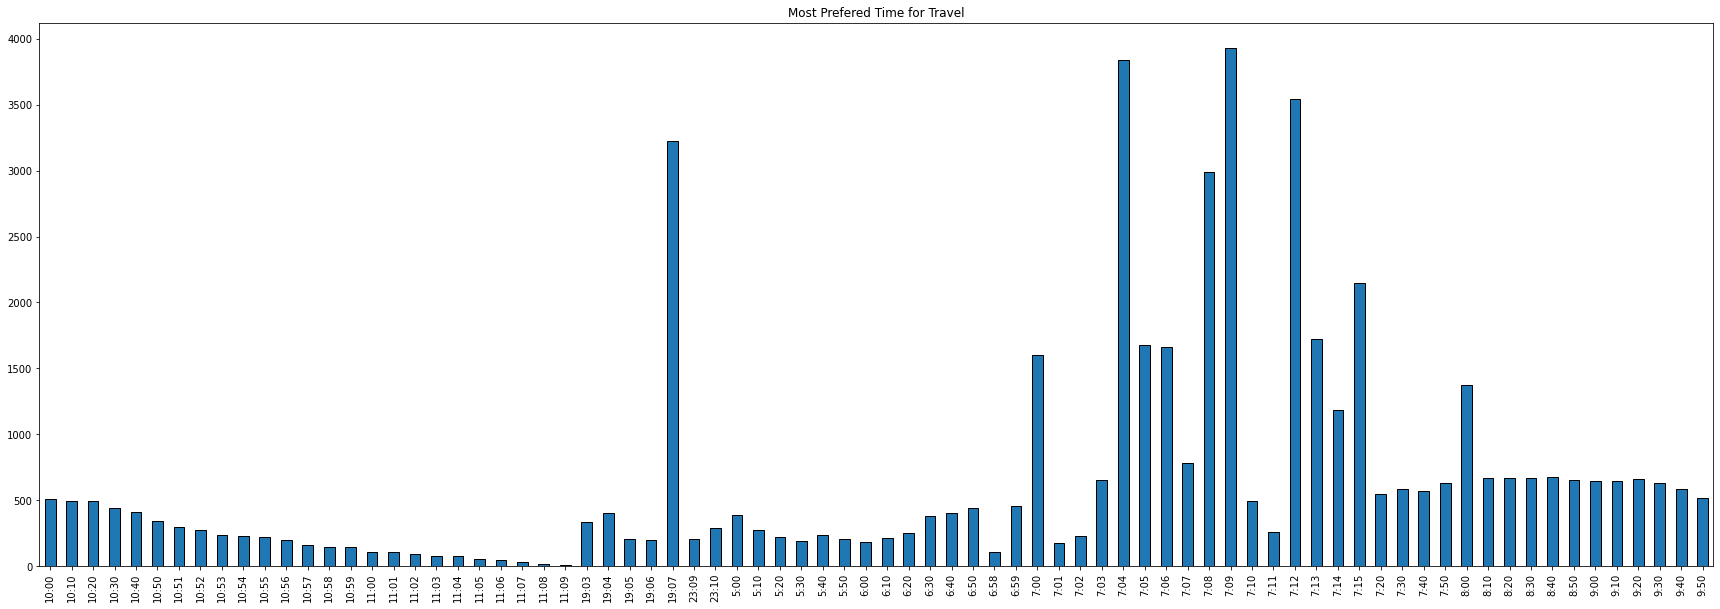

In [611]:
traveled_time_counts.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(30,10),title='Most Prefered Time for Travel')

In [612]:
df['travel_date']=pd.to_datetime(df['travel_date'], format='%d-%m-%y')

In [613]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49


In [614]:
df['year']=df['travel_date'].dt.year
df['month']=df['travel_date'].dt.month
df['day']=df['travel_date'].dt.day

df['weekday']=df['travel_date'].dt.day_name()

In [615]:

df['travel_date']=pd.to_datetime(df['travel_date'])


In [616]:
traveled_date_counts=df['travel_date'].dt.date.value_counts()
traveled_date_counts

2017-12-10    856
2017-12-14    797
2017-12-13    730
2017-12-07    723
2017-12-08    722
             ... 
2017-12-25      8
2017-10-17      1
2017-11-19      1
2017-11-26      1
2017-11-14      1
Name: travel_date, Length: 149, dtype: int64

In [617]:
traveled_date_counts=traveled_date_counts.sort_index(ascending=True)

In [618]:
traveled_date_counts

2017-10-17      1
2017-11-14      1
2017-11-19      1
2017-11-26      1
2017-11-27    305
             ... 
2018-04-16    402
2018-04-17    372
2018-04-18    354
2018-04-19    366
2018-04-20    355
Name: travel_date, Length: 149, dtype: int64

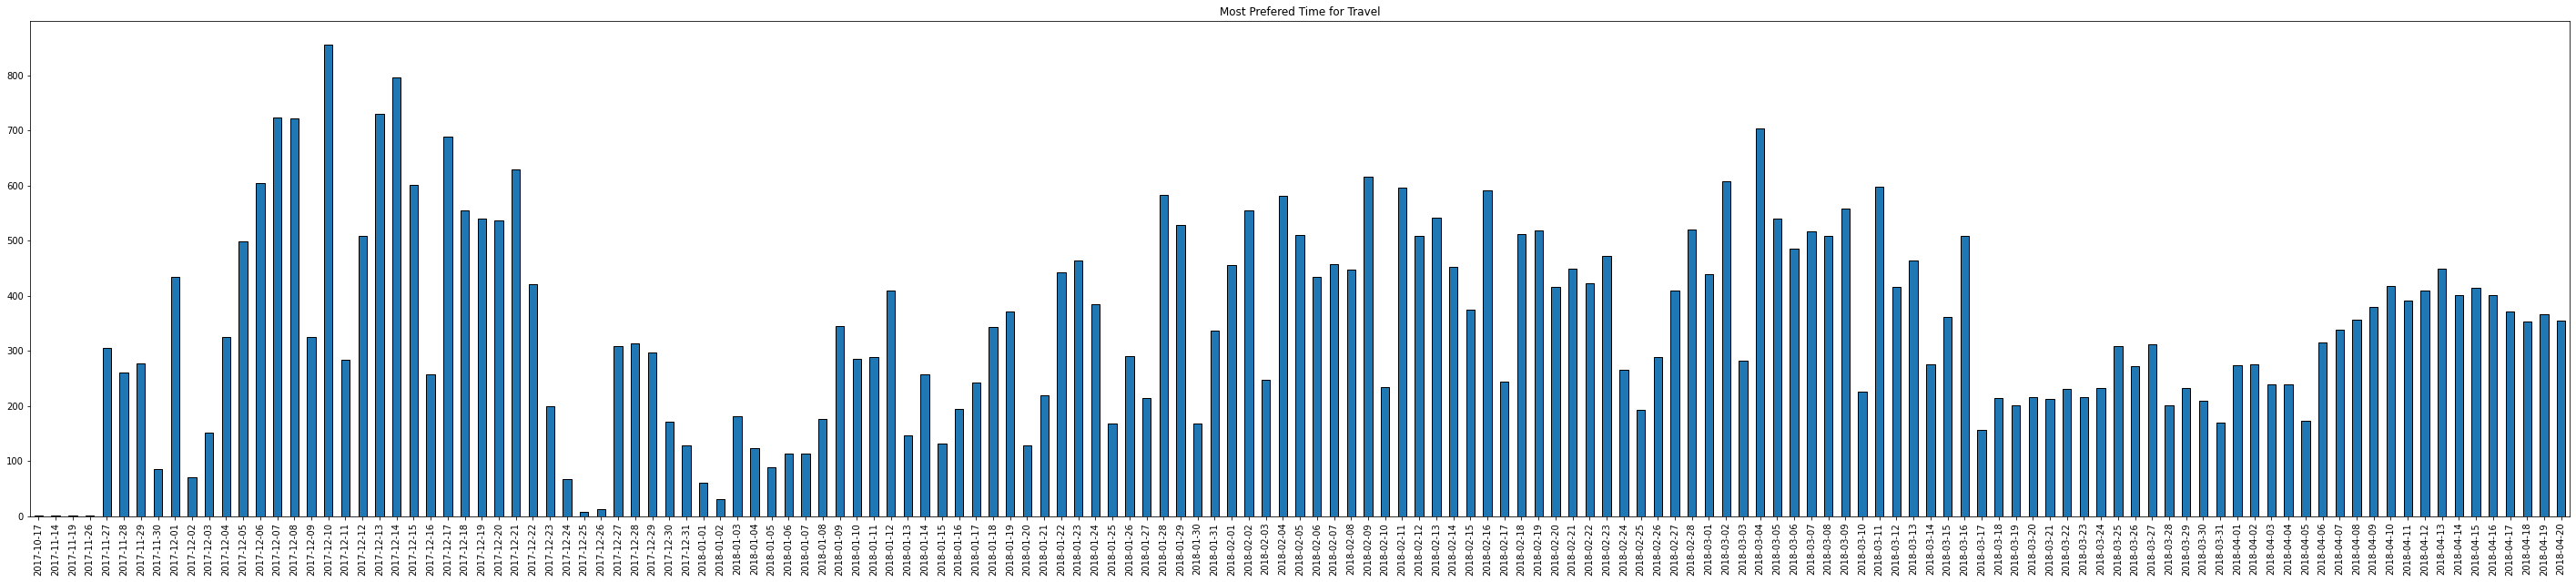

In [619]:
traveled_date_counts.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(50,10),title='Most Prefered Time for Travel')

In [620]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,Sunday
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,Monday
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,2018,4,20,Friday
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,Friday
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,Friday
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,2018,4,20,Friday


In [622]:
weekday_count=df.groupby(df['weekday']).count()

In [623]:
weekday_count

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day
weekday,,,,,,,,,,,,,
Friday,9092,9092,9092,9092,9092,9092,9092,9092,9092,9092,9092,9092,9092
Monday,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131
Saturday,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
Sunday,7819,7819,7819,7819,7819,7819,7819,7819,7819,7819,7819,7819,7819
Thursday,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893
Tuesday,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331
Wednesday,7955,7955,7955,7955,7955,7955,7955,7955,7955,7955,7955,7955,7955
